# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, seaborn, and scipy.

In [60]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Set seaborn style for plots
sns.set(style="whitegrid")

# Load the Titanic Dataset
Load the Titanic dataset from a CSV file using pandas.

In [61]:
# Load the Titanic Dataset
titanic_df = pd.read_csv('Titanic Dataset.csv')

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing
Handle missing values and encode categorical variables.

In [62]:
# Data Preprocessing
# Handle missing values and encode categorical variables

# Fill missing values for 'Age' with the median age
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Fill missing values for 'Embarked' with the mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Drop the 'Cabin' column as it has too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Drop rows with missing values in 'Fare'
titanic_df.dropna(subset=['Fare'], inplace=True)

# Encode categorical variables
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

# Drop columns that won't be used for clustering
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Standardize the features
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(titanic_df)

# Display the first few rows of the preprocessed dataset
pd.DataFrame(titanic_scaled, columns=titanic_df.columns).head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,-0.757354,0.875330,-0.757354,0.394417,-0.500218,-0.400804,-0.497811,2.839933,-1.348172
1,1.320387,0.875330,1.320387,1.385449,0.615242,-0.400804,-0.512660,-0.352121,0.741745
2,-0.757354,-0.313636,-0.757354,2.574688,-0.500218,-0.400804,-0.464532,2.839933,-1.348172
3,-0.757354,0.875330,-0.757354,-0.200203,-0.500218,-0.400804,-0.482888,-0.352121,0.741745
4,1.320387,0.875330,1.320387,-0.596616,0.615242,0.618314,-0.417971,-0.352121,0.741745


# Feature Selection
Select relevant features for clustering.

In [63]:
# Feature Selection

# Select relevant features for clustering
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
titanic_features = titanic_df[features]

# Standardize the selected features
titanic_features_scaled = scaler.fit_transform(titanic_features)

# Display the first few rows of the selected and scaled features
pd.DataFrame(titanic_features_scaled, columns=features).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.875330,-0.757354,0.394417,-0.500218,-0.400804,-0.497811,2.839933,-1.348172
1,0.875330,1.320387,1.385449,0.615242,-0.400804,-0.512660,-0.352121,0.741745
2,-0.313636,-0.757354,2.574688,-0.500218,-0.400804,-0.464532,2.839933,-1.348172
3,0.875330,-0.757354,-0.200203,-0.500218,-0.400804,-0.482888,-0.352121,0.741745
4,0.875330,1.320387,-0.596616,0.615242,0.618314,-0.417971,-0.352121,0.741745


# Standardize the Data
Standardize the data using StandardScaler from sklearn.

In [64]:
# Standardize the Data

# Standardize the selected features using StandardScaler
scaler = StandardScaler()
titanic_features_scaled = scaler.fit_transform(titanic_features)

# Display the first few rows of the selected and scaled features
pd.DataFrame(titanic_features_scaled, columns=features).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.875330,-0.757354,0.394417,-0.500218,-0.400804,-0.497811,2.839933,-1.348172
1,0.875330,1.320387,1.385449,0.615242,-0.400804,-0.512660,-0.352121,0.741745
2,-0.313636,-0.757354,2.574688,-0.500218,-0.400804,-0.464532,2.839933,-1.348172
3,0.875330,-0.757354,-0.200203,-0.500218,-0.400804,-0.482888,-0.352121,0.741745
4,0.875330,1.320387,-0.596616,0.615242,0.618314,-0.417971,-0.352121,0.741745


# Hierarchical Clustering
Perform hierarchical clustering using scipy's linkage method.

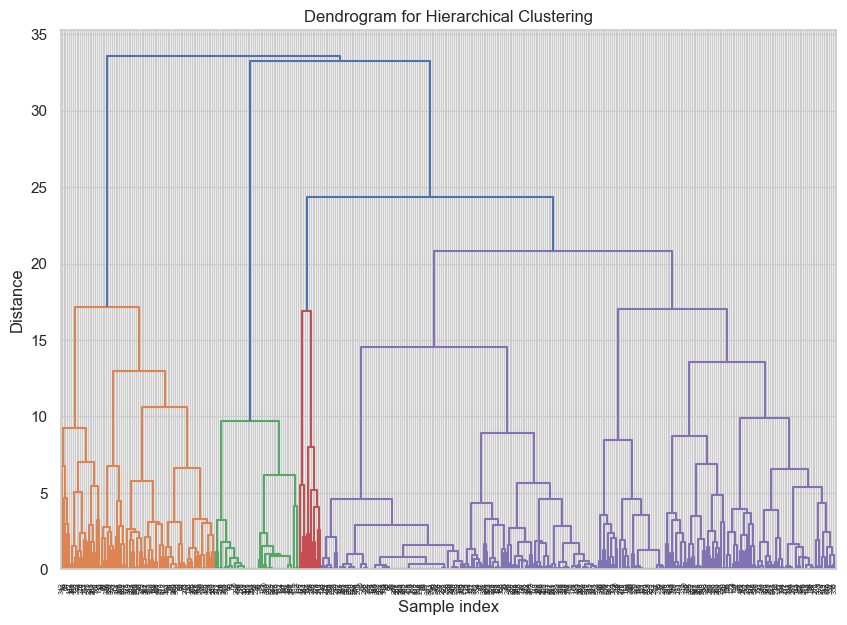

In [65]:
# Hierarchical Clustering

# Perform hierarchical clustering using scipy's linkage method
Z = linkage(titanic_features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
dendrogram(Z)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

# Determine Optimal Number of Clusters using Elbow Method
Calculate the within-cluster sum of squares for different numbers of clusters.

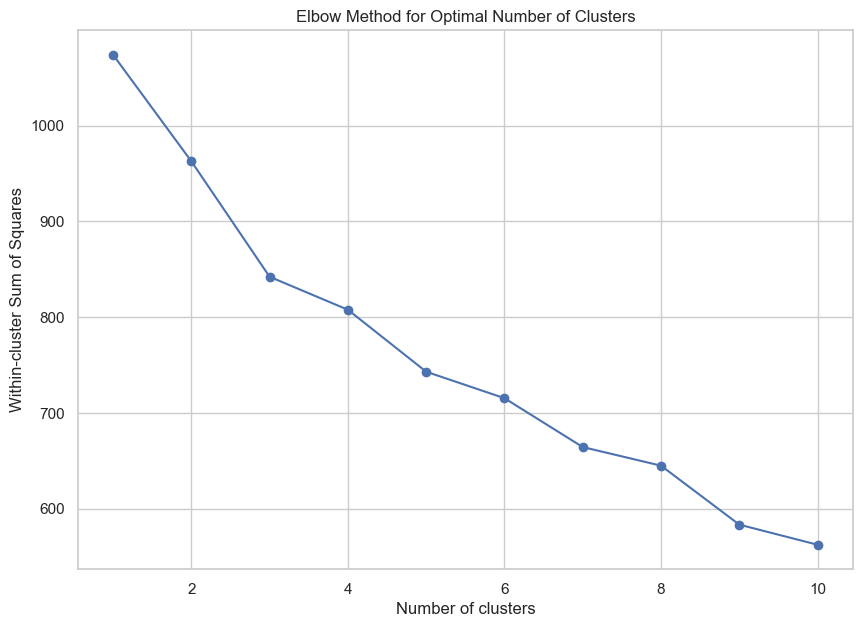

In [66]:
# Determine Optimal Number of Clusters using Elbow Method

# Calculate the within-cluster sum of squares for different numbers of clusters
from scipy.cluster.hierarchy import fcluster

# Calculate the within-cluster sum of squares for different numbers of clusters
wcss = []
for i in range(1, 11):
    clusters = fcluster(Z, i, criterion='maxclust')
    centroids = np.array([titanic_features_scaled[clusters == j].mean(axis=0) for j in range(1, i + 1)])
    wcss.append(sum(np.min(np.linalg.norm(titanic_features_scaled[:, np.newaxis] - centroids, axis=2), axis=1)))

# Plot the elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster Sum of Squares")
plt.show()